In [1]:
# --- std / 3rd-party ----------------------------------------------------------
import sys, os, time, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# --- local package ------------------------------------------------------------
sys.path.append(os.path.abspath('..'))
from mlmc import MLMC, C_MLMC
from mlmc.bs_model import MilsteinBSLevelFunction, bs_exact_call
from mlmc.payoffs import call_payoff

In [2]:
# Black-Scholes parameters
S0     = 100.0     # Initial stock price
K      = 100.0     # Strike price
r      = 0.05      # Risk-free rate
sigma  = 0.2       # Volatility
T      = 1.0       # Time to maturity
payoff = lambda S: np.maximum(S - K, 0.0)


In [3]:
# Create MLMC-compatible step function
level_fn = MilsteinBSLevelFunction(S0, r, sigma, T, payoff).simulate


In [4]:
# Instantiate and run MLMC
mlmc_obj = MLMC(level_fn, Lmin=2, Lmax=20, N0=2000)
eps = 0.01  # Target RMS error
price, Nl, Cl, total_cost = mlmc_obj.estimate(eps)

# Exact price
exact = bs_exact_call(S0, K, r, sigma, T)

print(f"MLMC Price: {price:.5f}")
print(f"Exact Price: {exact:.5f}")
print(f"Samples per level: {Nl}")


Level 0: mean=9.2828e+00, std=1.2950e+01
Level 1: mean=1.7559e-01, std=3.4935e-01
Level 2: mean=9.2537e-02, std=1.9417e-01
Level 0: mean=1.0055e+01, std=1.3999e+01
Level 1: mean=1.8345e-01, std=3.8674e-01
Level 2: mean=1.0325e-01, std=2.0409e-01
Level 0: mean=1.0058e+01, std=1.3989e+01
Level 1: mean=1.8260e-01, std=3.7505e-01
[Bias Check] L=2, extrapolated remainder=4.0789e+01, threshold=5.0000e-03
Level 3: mean=5.4957e-02, std=1.1144e-01
Level 0: mean=1.0091e+01, std=1.3987e+01
Level 1: mean=1.6486e-01, std=3.3498e-01
Level 3: mean=5.5962e-02, std=1.1595e-01
Level 0: mean=1.0026e+01, std=1.4248e+01
Level 3: mean=5.9824e-02, std=1.1258e-01
[Bias Check] L=3, extrapolated remainder=7.3915e-01, threshold=5.0000e-03
Level 4: mean=2.6759e-02, std=5.4288e-02
Level 0: mean=9.9769e+00, std=1.3954e+01
Level 1: mean=2.0564e-01, std=4.3092e-01
Level 3: mean=4.3978e-02, std=9.1806e-02
Level 4: mean=2.7453e-02, std=5.6691e-02
Level 0: mean=8.9900e+00, std=1.3884e+01
Level 1: mean=1.6150e-01, std=3.

In [5]:
total_cost

11433876.0

In [6]:
Cl

array([1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01,
       6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03])

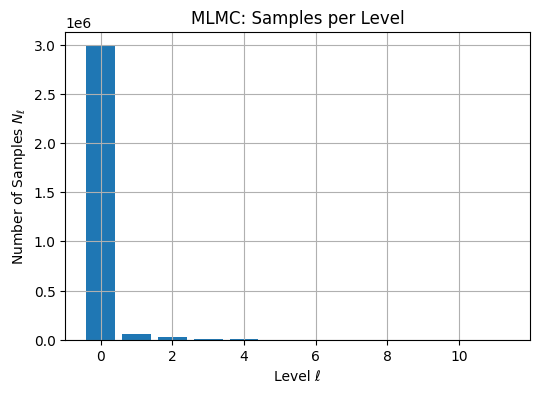

In [7]:
levels = np.arange(len(Nl))
plt.figure(figsize=(6, 4))
plt.bar(levels, Nl)
plt.xlabel("Level ℓ")
plt.ylabel("Number of Samples $N_\\ell$")
plt.title("MLMC: Samples per Level")
plt.grid(True)
plt.show()


In [8]:
# Define a simple feature extractor (example: just use the fine payoff value)
def feature_fn(detail: dict) -> np.ndarray:
    return np.array([detail["pf_value"]])

# Instantiate and run C-MLMC
c_mlmc_obj = C_MLMC(level_fn, feature_fn=feature_fn, Lmin=2, Lmax=20, N0=2000)
eps = 0.01  # Target RMS error
price, Nl, Cl, total_cost = c_mlmc_obj.estimate(eps)

# Exact price
exact = bs_exact_call(S0, K, r, sigma, T)

print(f"C-MLMC Price: {price:.5f}")
print(f"Exact Price: {exact:.5f}")
print(f"Samples per level: {Nl}")

Level 0: mean=9.9173e+00, std=1.3857e+01
Level 1: mean=1.6598e-01, std=3.6839e-01
Level 2: mean=9.5860e-02, std=1.9771e-01
Level 0: mean=1.0380e+01, std=1.4499e+01
Level 0: mean=9.7864e+00, std=1.3454e+01
Level 0: mean=9.7295e+00, std=1.3724e+01
Level 0: mean=9.9315e+00, std=1.3612e+01
Level 0: mean=9.7568e+00, std=1.3870e+01
Level 0: mean=9.4271e+00, std=1.3265e+01
Level 0: mean=9.4326e+00, std=1.3256e+01
Level 0: mean=1.0084e+01, std=1.4148e+01
Level 0: mean=1.0278e+01, std=1.4338e+01
Level 0: mean=1.0233e+01, std=1.4099e+01
Level 0: mean=9.8739e+00, std=1.3579e+01
Level 0: mean=9.8714e+00, std=1.4065e+01
Level 0: mean=9.5887e+00, std=1.3724e+01
Level 0: mean=8.9314e+00, std=1.2781e+01
Level 0: mean=9.7773e+00, std=1.3718e+01
Level 0: mean=1.0295e+01, std=1.4368e+01
Level 0: mean=9.7445e+00, std=1.3794e+01
Level 0: mean=1.0461e+01, std=1.4314e+01
Level 0: mean=1.0295e+01, std=1.4038e+01
Level 0: mean=1.0124e+01, std=1.4272e+01
Level 0: mean=1.0232e+01, std=1.4357e+01
Level 0: mean=9.

In [9]:
total_cost

122921579.0